In [178]:
import torch
import matplotlib.pyplot as plt

In [179]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [180]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,random_state=42)

In [181]:
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

type(X),type(y)

(torch.Tensor, torch.Tensor)

In [182]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(X_test)

(800, 200)

In [183]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [184]:
from torch import nn

class BinaryClassificationExercise(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,1)
        )
        
    def forward(self,x):
        return self.layers(x)

In [185]:
import sys
from pathlib import Path

sys.path.append(str(Path("helper_functions.py").resolve().parent.parent))

# Setelah parent path ditambahkan, kamu bisa mengimpor seperti biasa
from helper_functions import plot_decision_boundary

In [186]:
model = BinaryClassificationExercise()

In [187]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.1)

In [188]:
from torchmetrics.functional.classification import binary_accuracy

epochs_value = []
train_error = []
test_error  = []

epochs = 100

for epoch in range(epochs):
    model.train()
    y_train_logits = model(X_train).squeeze()
    y_train_preds = torch.round(torch.sigmoid(y_train_logits)).squeeze()

    train_loss = loss_fn(y_train_logits,y_train)
    train_acc = binary_accuracy(y_train_preds,y_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        epochs_value.append(epoch)
        train_error.append(train_loss)

        model.eval()
        with torch.inference_mode():
            y_test_logits = model(X_test).squeeze()
            y_test_preds = torch.round(torch.sigmoid(y_test_logits)).squeeze()

            test_loss = loss_fn(y_test_logits,y_test)
            test_error.append(test_loss)
            test_acc = binary_accuracy(y_test_preds,y_test)

            print(
                f"Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Train acc: {test_acc:.4f} |"
            )

Train Loss: 0.7040 | Train acc: 0.5000 | Test loss: 0.5922 | Train acc: 0.7350 |
Train Loss: 0.2417 | Train acc: 0.8913 | Test loss: 0.2221 | Train acc: 0.9000 |
Train Loss: 0.1327 | Train acc: 0.9500 | Test loss: 0.1157 | Train acc: 0.9750 |
Train Loss: 0.0154 | Train acc: 1.0000 | Test loss: 0.0090 | Train acc: 1.0000 |
Train Loss: 0.0007 | Train acc: 1.0000 | Test loss: 0.0004 | Train acc: 1.0000 |
Train Loss: 0.0002 | Train acc: 1.0000 | Test loss: 0.0002 | Train acc: 1.0000 |
Train Loss: 0.0001 | Train acc: 1.0000 | Test loss: 0.0001 | Train acc: 1.0000 |
Train Loss: 0.0001 | Train acc: 1.0000 | Test loss: 0.0001 | Train acc: 1.0000 |
Train Loss: 0.0001 | Train acc: 1.0000 | Test loss: 0.0001 | Train acc: 1.0000 |
Train Loss: 0.0001 | Train acc: 1.0000 | Test loss: 0.0000 | Train acc: 1.0000 |


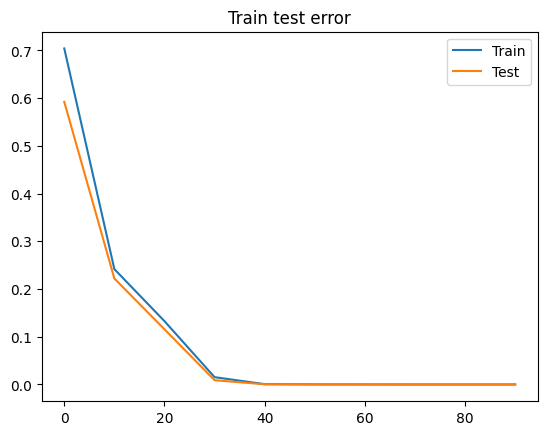

In [189]:
plt.title("Train test error")

plt.plot(torch.tensor(epochs_value).cpu(),torch.tensor(train_error).cpu(),label="Train")
plt.plot(
    torch.tensor(epochs_value).cpu(), torch.tensor(test_error).cpu(), label="Test"
)

plt.legend()

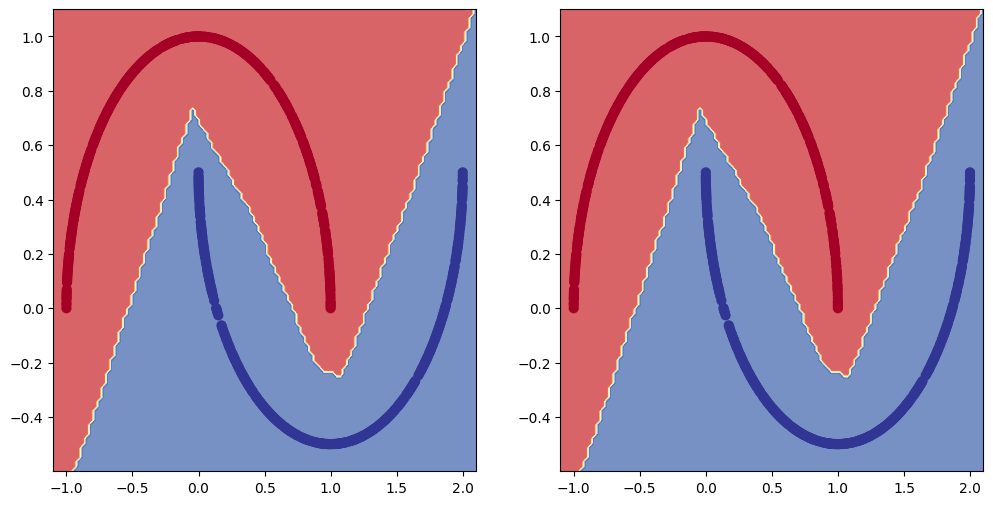

In [190]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

# plt.title("")

plt.sca(axes[0])
plot_decision_boundary(model,X_train,y_train)

plt.sca(axes[1])
plot_decision_boundary(model, X_train, y_train)

In [191]:
def replicated_tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / torch.exp(x) + torch.exp(-x)

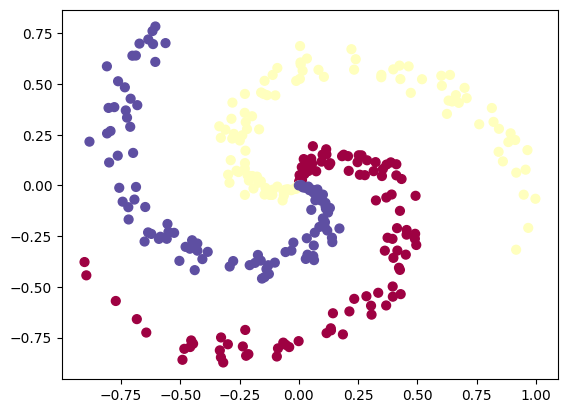

In [192]:
import numpy as np

N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype="uint8")  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [193]:
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.LongTensor)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [195]:
print(f"Len X and y is: {len(X)} , {len(y)}")
print(f"Shape X and y is: {X.shape} , {y.shape}")

Len X and y is: 300 , 300
Shape X and y is: torch.Size([300, 2]) , torch.Size([300])


In [196]:
class MultiClassificationExercise(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,3)
        )
        
    def forward(self,x):
        return self.layers(x)

In [197]:
model2 = MultiClassificationExercise()

In [198]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model2.parameters(),lr=0.1)

In [199]:
from torchmetrics.functional.classification import multiclass_accuracy
epochs = 200

for epoch in range(epochs):
    model2.train()
    y_train_logits = model2(X_train)
    y_train_preds = torch.softmax(y_train_logits,dim=1).argmax(dim=1)

    train_loss = loss_fn(y_train_logits,y_train)
    train_acc = multiclass_accuracy(y_train_preds,y_train,num_classes=3)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        model2.eval()
        with torch.inference_mode():
            y_test_logits = model2(X_test)
            y_test_preds = torch.softmax(y_test_logits,dim=1).argmax(dim=1)
            
            test_loss = loss_fn(y_test_logits,y_test)
            test_acc = multiclass_accuracy(y_test_logits,y_test,num_classes=3)
            
            print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

Train loss: 1.0983 | Train acc: 0.3333 | Test loss: 1.0693 | Test acc: 0.3750
Train loss: 0.7043 | Train acc: 0.6774 | Test loss: 0.8398 | Test acc: 0.5511
Train loss: 0.4723 | Train acc: 0.7561 | Test loss: 0.5243 | Test acc: 0.7992
Train loss: 0.2315 | Train acc: 0.9093 | Test loss: 0.3201 | Test acc: 0.9337
Train loss: 0.1351 | Train acc: 0.9621 | Test loss: 0.2538 | Test acc: 0.9280
Train loss: 0.1017 | Train acc: 0.9585 | Test loss: 0.1847 | Test acc: 0.9640
Train loss: 0.0838 | Train acc: 0.9664 | Test loss: 0.1612 | Test acc: 0.9640
Train loss: 0.0761 | Train acc: 0.9747 | Test loss: 0.1245 | Test acc: 0.9640
Train loss: 0.0699 | Train acc: 0.9750 | Test loss: 0.0991 | Test acc: 0.9640
Train loss: 0.0642 | Train acc: 0.9789 | Test loss: 0.0689 | Test acc: 0.9640
Train loss: 0.0592 | Train acc: 0.9789 | Test loss: 0.0924 | Test acc: 0.9640
Train loss: 0.0928 | Train acc: 0.9625 | Test loss: 0.1022 | Test acc: 0.9697
Train loss: 0.1093 | Train acc: 0.9536 | Test loss: 0.2306 | Tes

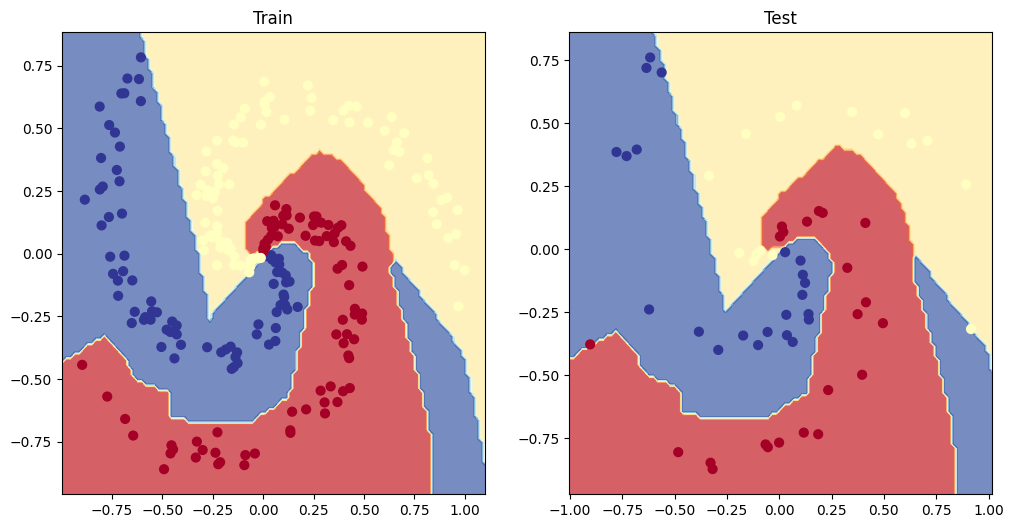

In [200]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

plt.sca(axes[0])
axes[0].set_title("Train")
plot_decision_boundary(model2,X_train,y_train)

plt.sca(axes[1])
axes[1].set_title("Test")
plot_decision_boundary(model2, X_test, y_test)